<a href="https://colab.research.google.com/github/nikhilbansal23/Predicting_Emojis_in_Tweets/blob/main/Predicting_Emojis_in_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl
import re

In [2]:
tweets_path = '/content/drive/MyDrive/Datasets/Predicting Emojis in Tweets/tweets.txt'
emojis_path = '/content/drive/MyDrive/Datasets/Predicting Emojis in Tweets/emoji.txt'

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Read data from the text file
with open(tweets_path, 'r', encoding='utf-8') as file:
    data = file.read()

# Define a regular expression pattern to extract user and tweet
pattern = re.compile(r'RT @(\w+): (.+)')

# Use findall to get all matches in the data
matches = pattern.findall(data)

# Create a DataFrame
tweets_df = pd.DataFrame(matches, columns=['User', 'Tweet'])

In [15]:
emoji_df = pd.read_csv(emojis_path, header=None, names=['EmojiLabel'])


# **Handling Data Duplicates**

In [6]:
# Counting duplicate rows
duplicate_count = tweets_df.duplicated().sum()

# Displaying the result
print(f'Total rows: {len(tweets_df)}')
print(f'Total duplicate rows: {duplicate_count}')

Total rows: 69941
Total duplicate rows: 49664


In [7]:
len(tweets_df) - duplicate_count

20277

In [8]:
tweets_df['User'].nunique()

19219

In [9]:
tweets_df['Tweet'].nunique()

19727

In [10]:
tweets_df.drop_duplicates(inplace=True)


In [11]:
len(tweets_df)

20277

# **Missing Value Checks**

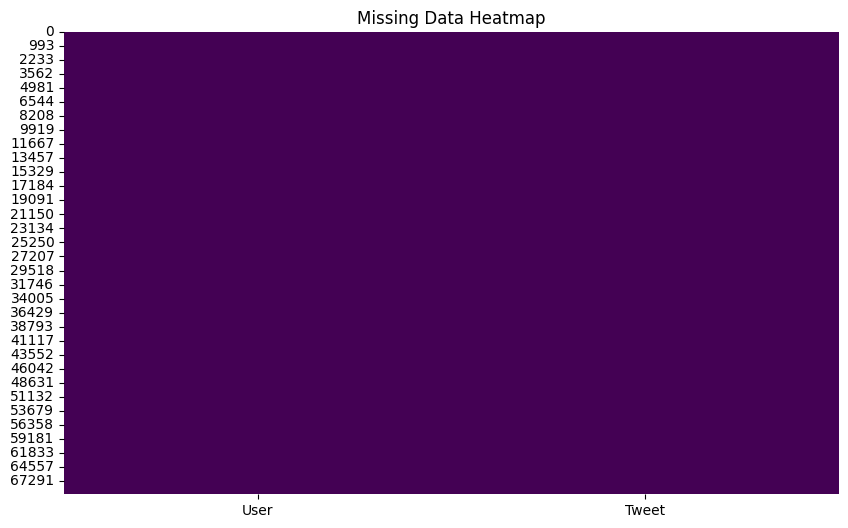

In [12]:
missing_data = tweets_df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(tweets_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# **Preprocess Text Data:**
Clean and preprocess the text data. This may include lowercasing, removing special characters, and tokenization.

In [23]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove '#' from hashtags and '@' from mentions
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'@(\w+)', r'\1', text)

    return text


In [34]:
# Apply the preprocessing function to the 'Tweet' column
tweets_df['ProcessedTweet'] = tweets_df['Tweet'].apply(preprocess_text)


In [36]:
tweets_df.sample(10)

,User,Tweet,ProcessedTweet
4837,T_Summmerall,wishin you good luck today and on a great season theet better get a head start on our bet we made @ThedaElizabeth https…,wishin you good luck today and on a great season theet better get a head start on our bet we made ThedaElizabeth
3086,jesssica_fish,bet yall wish yall wcw was as bad as mine http://t.co/mz1Hdi5tiD,bet yall wish yall wcw was as bad as mine
26968,irielcutno,Man why I'm just seeing this...and we are McDonalds https://t.co/OXSvMIWpSp,Man why I'm just seeing this...and we are McDonalds
38518,josueb211,@Jvhh_ I bet you can baby,Jvhh_ I bet you can baby
69090,TennisInsideOut,WHY IS EVERYONE SHIRTLESS WHEN I'M NOT THERE? THIS IS JUST CRUEL. https://t.co/bQuH31UNVl,WHY IS EVERYONE SHIRTLESS WHEN I'M NOT THERE? THIS IS JUST CRUEL.
7591,Pursuit0fArete,"She went to Kenya to eat at Java, Subway and KFC . As soon as I land in Nairobi, the first thing I'm eating ni mtura 5…","She went to Kenya to eat at Java, Subway and KFC . As soon as I land in Nairobi, the first thing I'm eating ni mtura 5…"
44280,TheeNatureBoy,@NigelGuwoppp ayy! Bet u can't drop like me. Can't milky rock like me,NigelGuwoppp ayy! Bet u can't drop like me. Can't milky rock like me
47934,toridennison,@toridennison she's bringing me starbucks rn https://t.co/b9lAeqN6Qa,toridennison she's bringing me starbucks rn
19489,sujkol,@02kritz @dominos_india This has happened with me too. Dominos should stop saying '30 min or free'. Very bad service.,02kritz dominos_india This has happened with me too. Dominos should stop saying '30 min or free'. Very bad service.
61278,tmose__,pls someone bring me Starbucks.,pls someone bring me Starbucks.


# Feature Extraction:

Convert the preprocessed text data into numerical representations using vectorization methods such as TF-IDF or word embeddings.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(tweets_df['ProcessedTweet'])

In [42]:
X

<20277x21833 sparse matrix of type '<class 'numpy.float64'>'
	with 179623 stored elements in Compressed Sparse Row format>

# **Label Encoding:**

Encode the emoji labels as numerical values.

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(emoji_df['EmojiLabel'])


# **Split the Data:**

Split the data into training and testing sets.

In [40]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
